In [10]:
import numpy as np
import matplotlib.pyplot as plt


def runge_kutta(time_steps, y0, system, params):
    ys = [y0]
    for t in range(len(time_steps)-1):
        dt = time_steps[t+1]-time_steps[t]
        t0 = time_steps[t]
        t1 = time_steps[t+1]
        k1 = system(t0, y0, params)
        k2 = system(t0 + dt/2, y0 + dt / 2 * k1, params)
        k3 = system(t0 + dt/2, y0 + dt / 2 * k2, params)
        k4 = system(t1, y0 + dt * k3, params)
        y0  = y0 + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        ys.append(y0)
    return np.array(ys)

def lorentz_ode(t, xyz, params):
    x, y, z = xyz
    σ = params['σ']
    ρ = params['ρ']
    β = params['β']
    
    dx = σ * (y - x)
    dy = x * (ρ - z) - y
    dz = x * y - β * z
    
    return np.array([dx, dy, dz])

time_steps = np.arange(0, 1500, 0.1)
params = {'σ' : 10., 'ρ' : 28., 'β' : 8/3}
xyz0 = np.array([1., 1., 1.])
lorenz_solution = runge_kutta(time_steps, xyz0, lorentz_ode, params)
x, y, z = lorenz_solution[2000:].T

In [11]:
x = (x - min(x)) / (max(x) - min(x))

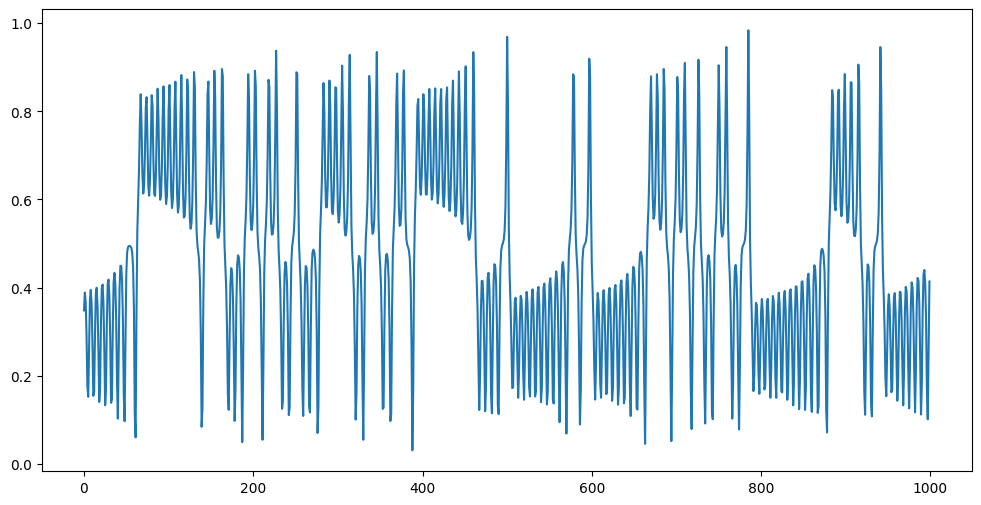

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(x[-1000:])

In [13]:
alpha = np.cumsum(np.array([0, 3, 1, 2]))
alpha

array([0, 3, 4, 6])

In [14]:
x = np.arange(100)

In [15]:
x[alpha + 66]

array([66, 69, 70, 72])

In [16]:
np.cumsum(np.array([3,1,2]))

array([3, 4, 6])